In [1]:
#importing all the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
# importing the data
data = pd.read_csv("winequalityN.csv")

# displaying the first few rows of the data
data.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
# displaying the first few rows of the data
data.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
# checking the information of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# obtaining descriptive statistics of the data
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
# checking for null values
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# filling null values using mean
mean = data['fixed acidity'].mean()
data['fixed acidity'].fillna(mean, inplace=True)

mean = data['volatile acidity'].mean()
data['volatile acidity'].fillna(mean, inplace=True)

mean = data['citric acid'].mean()
data['citric acid'].fillna(mean, inplace=True)

mean = data['residual sugar'].mean()
data['residual sugar'].fillna(mean, inplace=True)

mean = data['chlorides'].mean()
data['chlorides'].fillna(mean, inplace=True)

mean = data['pH'].mean()
data['pH'].fillna(mean, inplace=True)

mean = data['sulphates'].mean()
data['sulphates'].fillna(mean, inplace=True)

In [8]:
# checking again for null values
data.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

"""No null values remaining"""

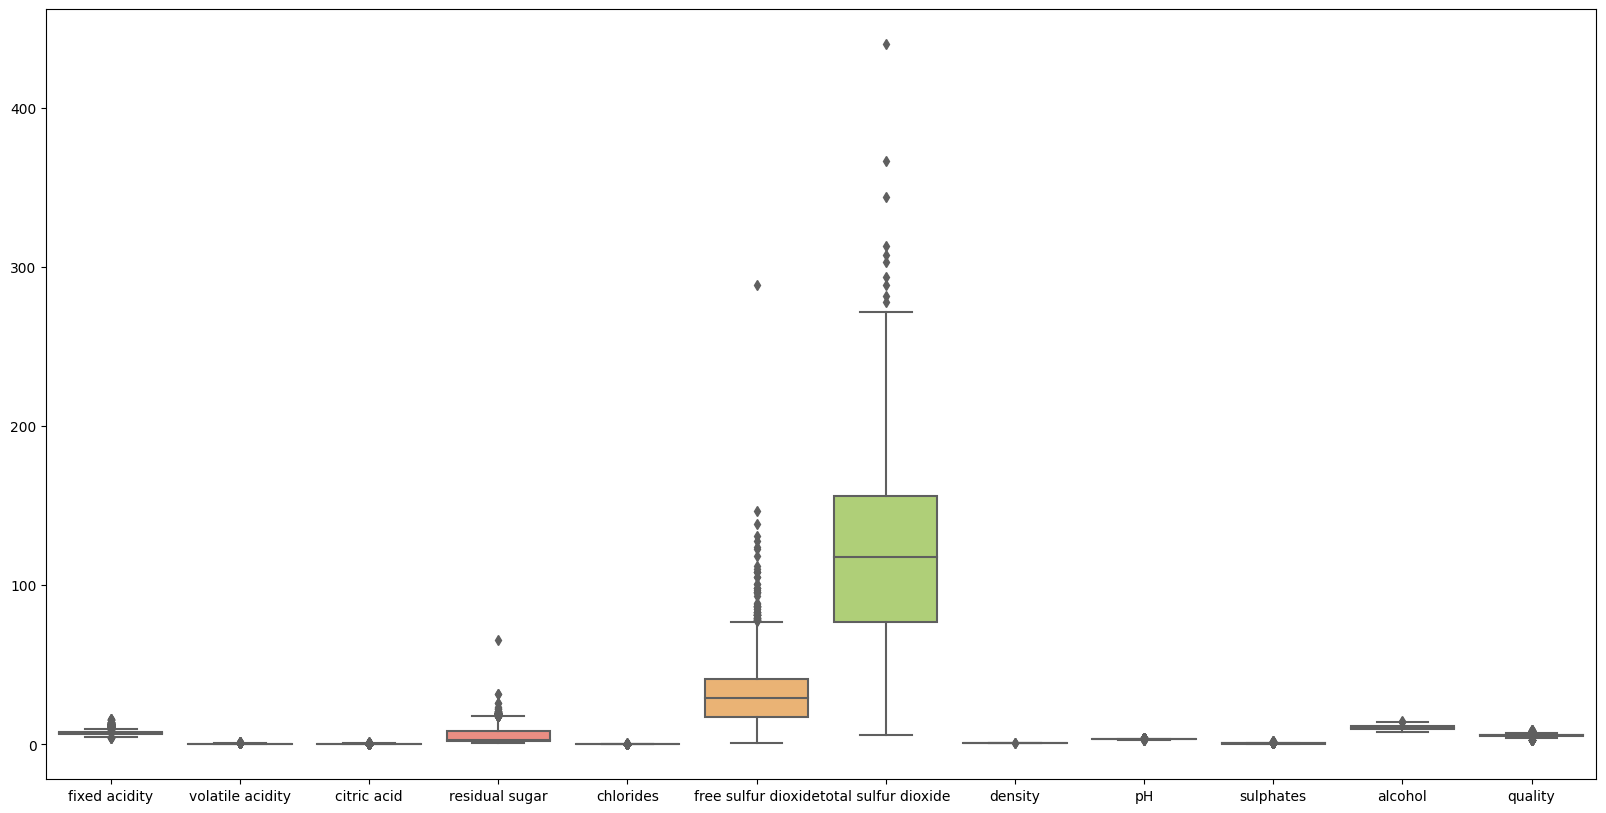

In [9]:
# data visualization

# Box plot of the data
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, palette="Set3")
plt.show()

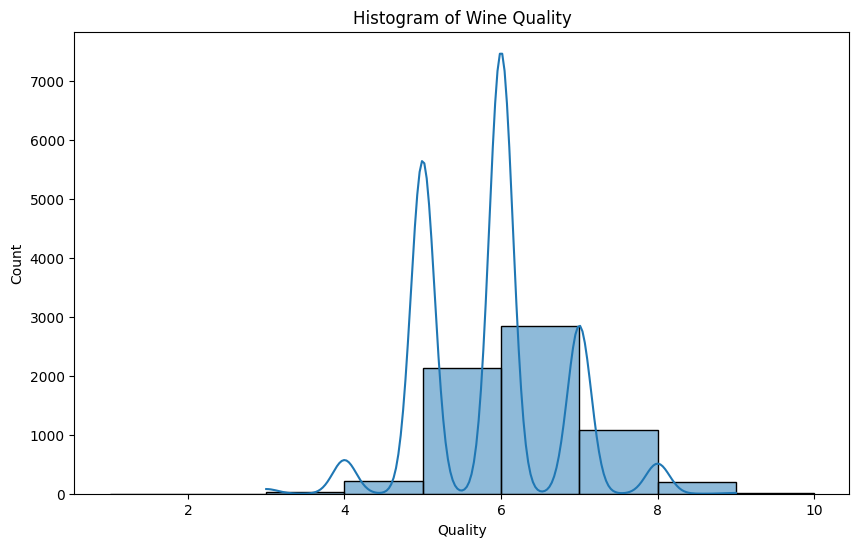

In [10]:
# Histogram of wine quality
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='quality', kde=True, bins=range(1, 11))
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<ipython-input-11-41a57b093cc8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = data.groupby('quality').mean()


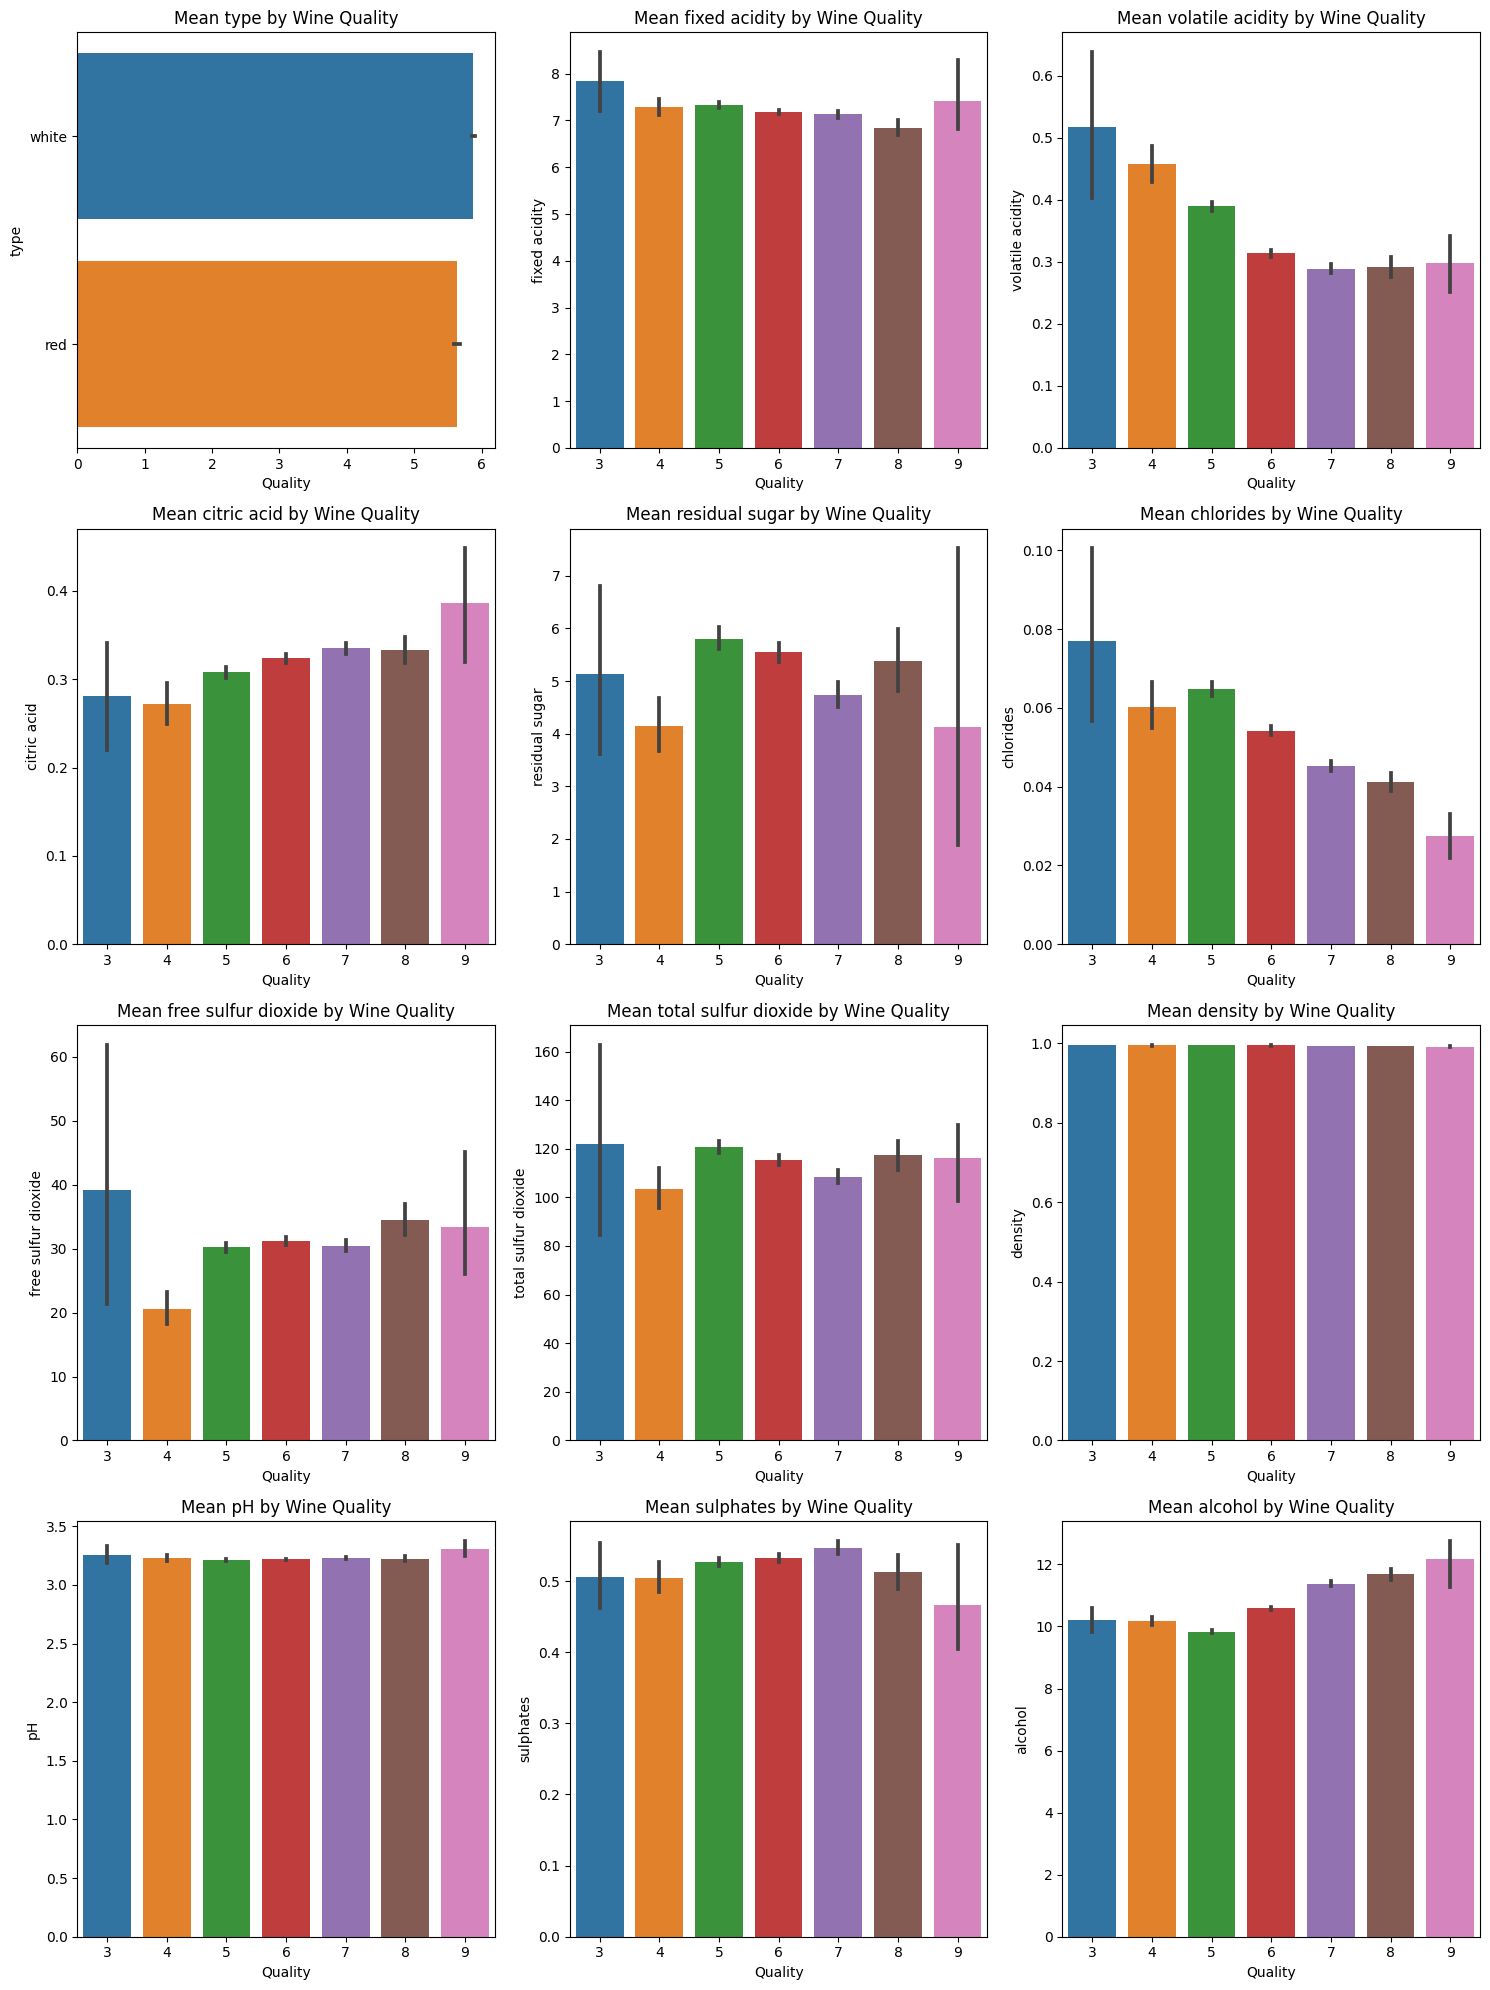

In [11]:
# Grouping the data by wine quality and calculating the mean values of each attribute
mean_values = data.groupby('quality').mean()

# Bar plots of attribute means by wine quality
attributes = data.columns[:-1]
num_attributes = len(attributes)
num_cols = 3
num_rows = num_attributes // num_cols + (num_attributes % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    sns.barplot(x='quality', y=attribute, data=data, ax=axes[i])
    axes[i].set_title(f'Mean {attribute} by Wine Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.show()


In [12]:
# Hypothesis testing

# Example of performing a t-test
from scipy.stats import ttest_ind

high_quality = data[data['quality'] >= 7]
low_quality = data[data['quality'] <= 4]

# Performing t-test on 'volatile acidity' attribute for high-quality and low-quality wines
t_statistic, p_value = ttest_ind(high_quality['volatile acidity'], low_quality['volatile acidity'])
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -17.35135229179408
P-Value: 1.1219391023527723e-61


The null hypothesis is that the mean volatile acidity for high-quality wines is the same as that for low-quality wines. A very small p-value, like the one we got, is a strong evidence against the null hypothesis and it suggests that there's almost no chance that the differences in 'volatile acidity' between high and low-quality wines happened just by coincidence. So, we can confidently say that there is a statistically significant difference in volatile acidity between high and low-quality wines.

In [13]:
# ANOVA test
from scipy.stats import f_oneway
quality_groups = [data[data['quality'] == i]['pH'] for i in range(3, 10)]
f_statistic, p_value = f_oneway(*quality_groups)
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 2.0103847276422733
P-Value: 0.06075683099709057


The p-value is a measure of the probability that an effect could be achieved by chance. Generally, a p-value less than 0.05 is considered statistically significant. This p-value is greater than 0.05, which indicates that the differences in mean pH values across the seven quality groups might have happened due to chance.

In simpler terms, based on this ANOVA test, we don't have strong evidence to say that the 'pH' levels are significantly different across the various wine quality categories.

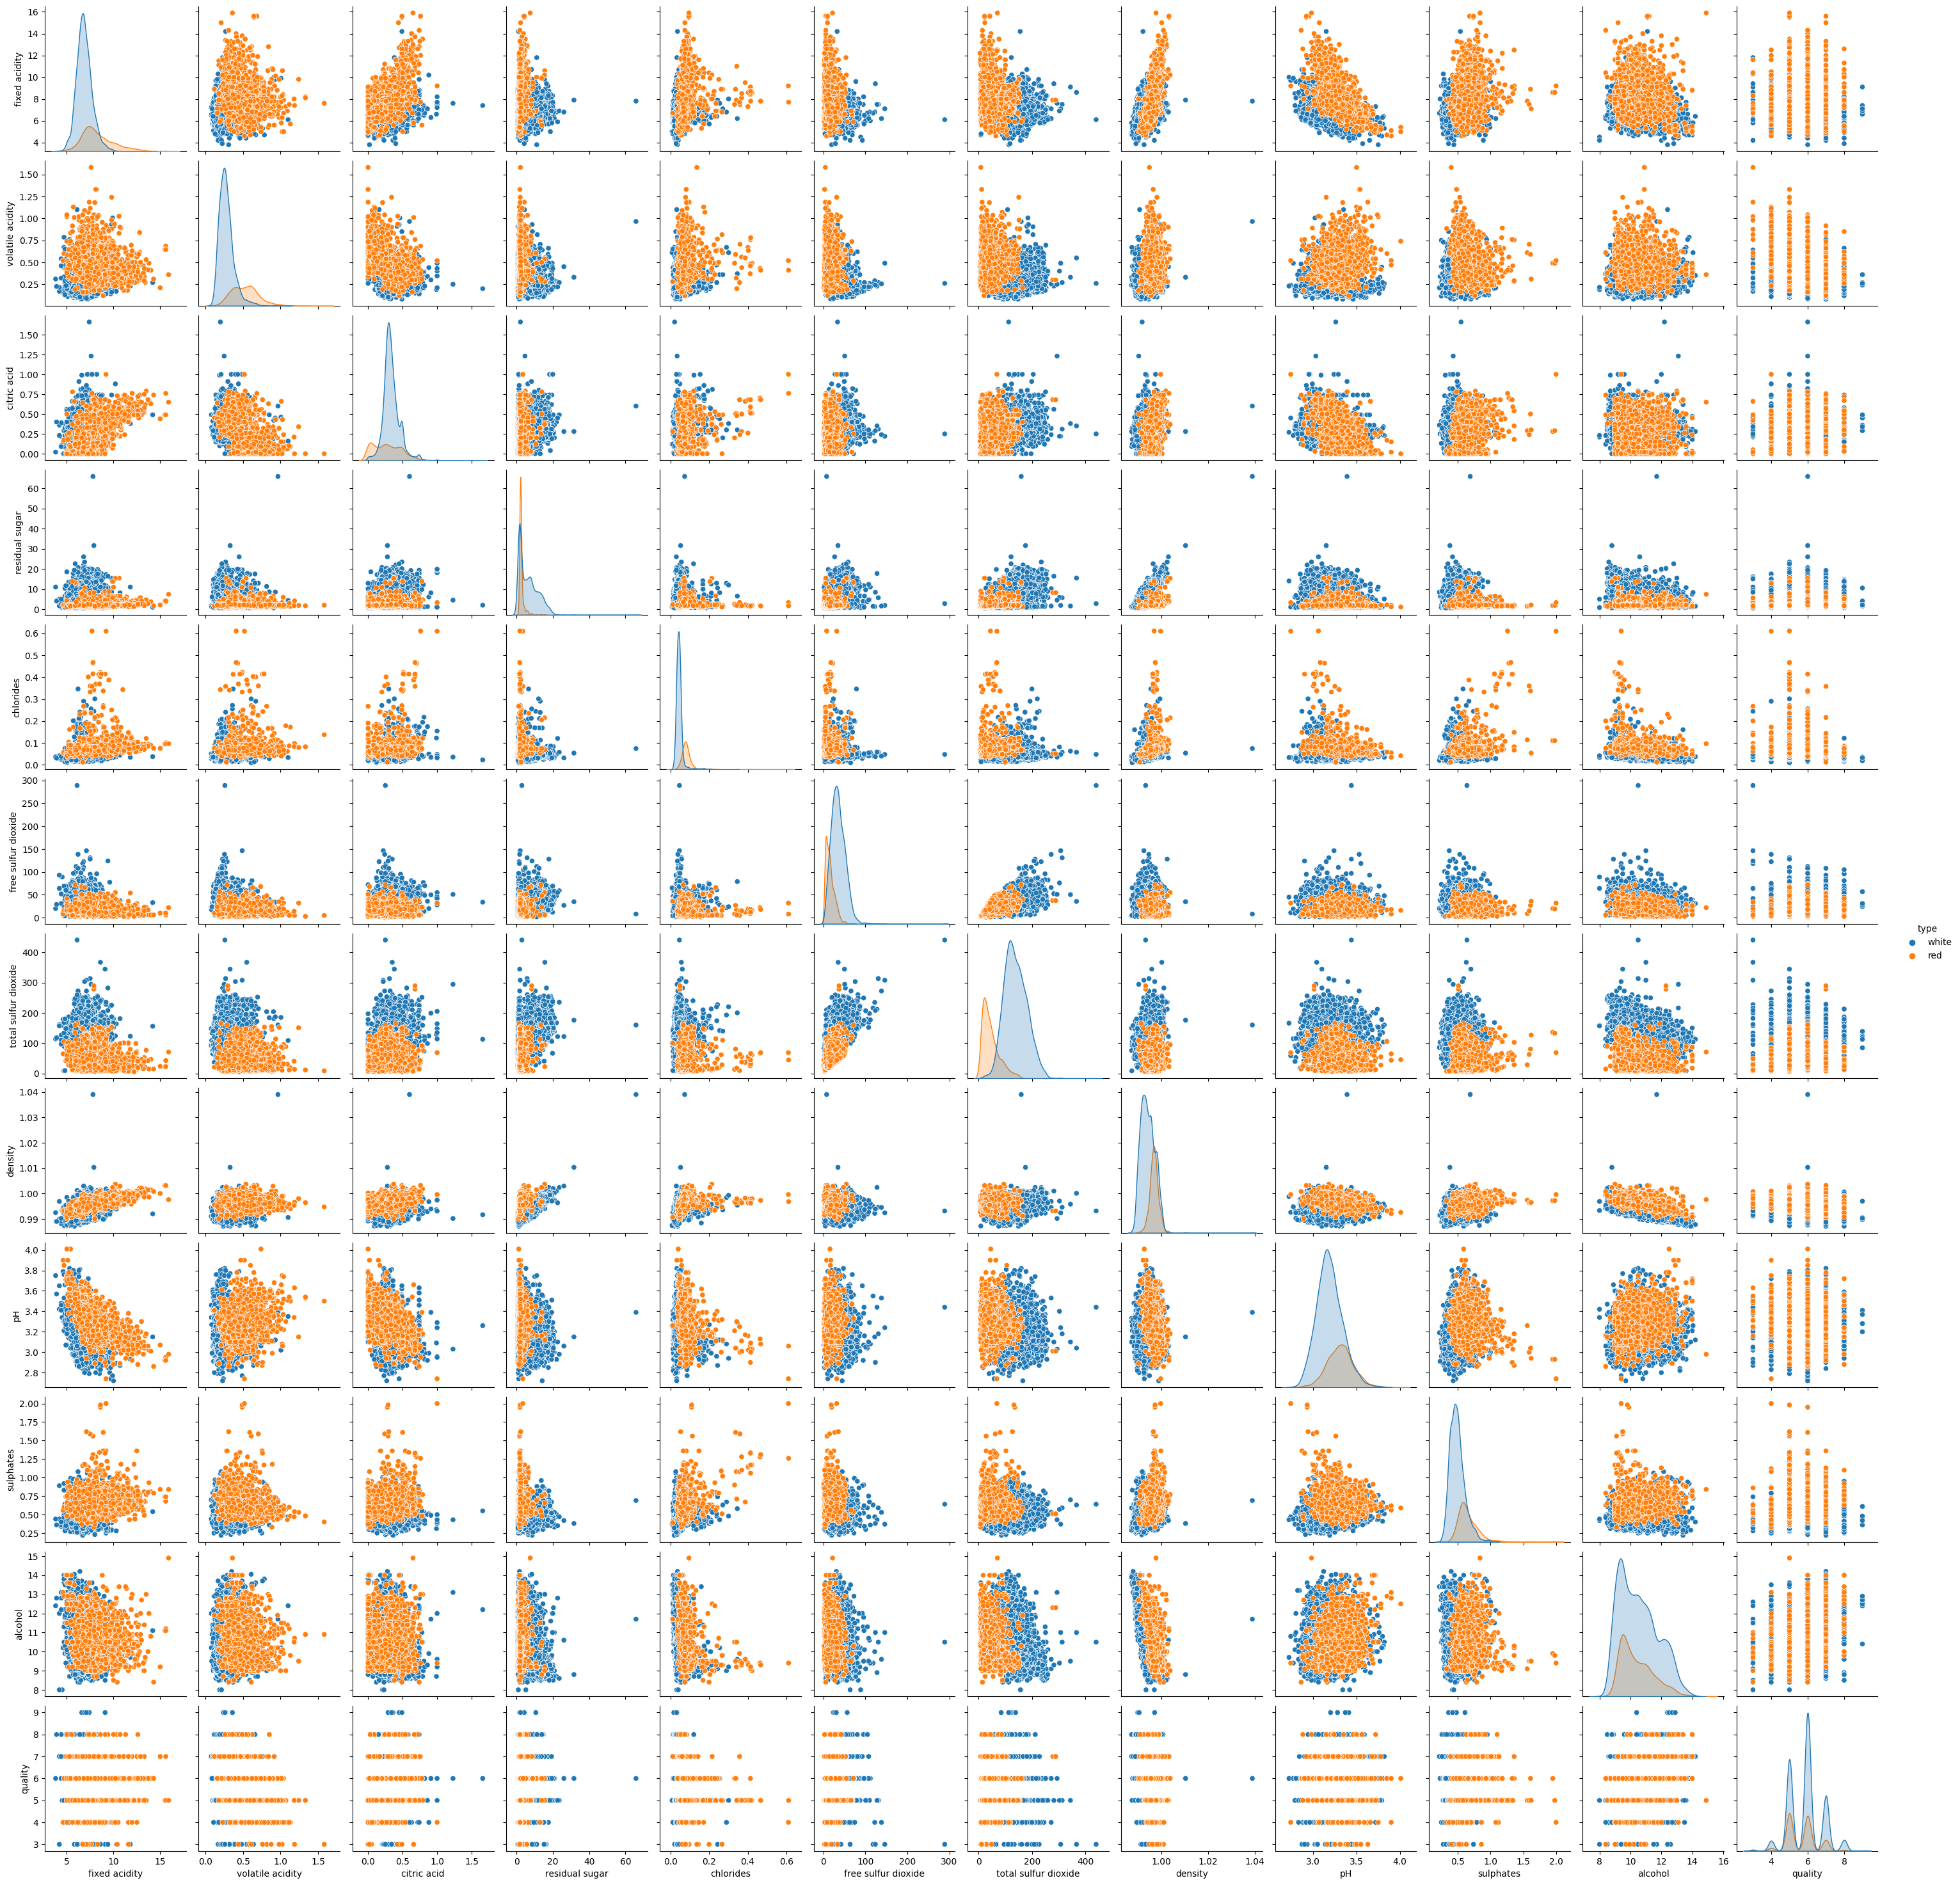

In [23]:
# Pair plot of the data with 'type' as hue
sns.pairplot(data, hue='type')
plt.show()


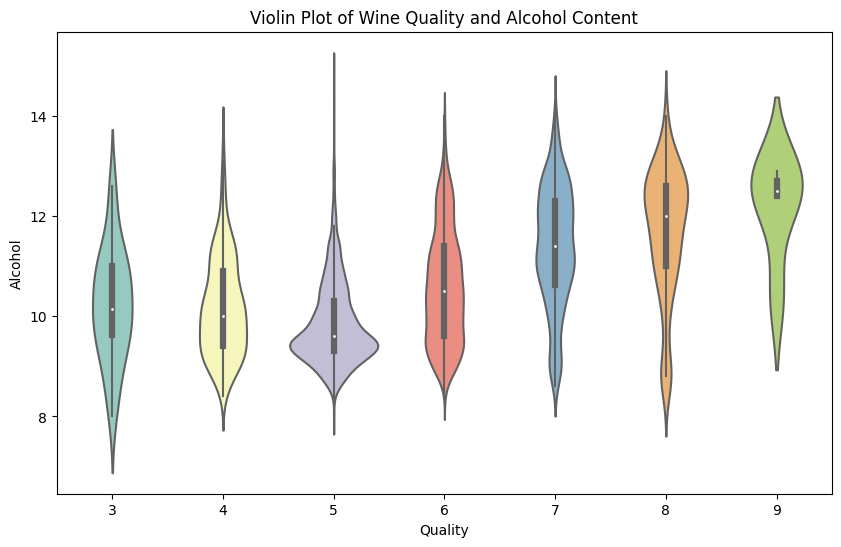

In [24]:
# Violin plot of wine quality and alcohol content
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='quality', y='alcohol', palette='Set3')
plt.title('Violin Plot of Wine Quality and Alcohol Content')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

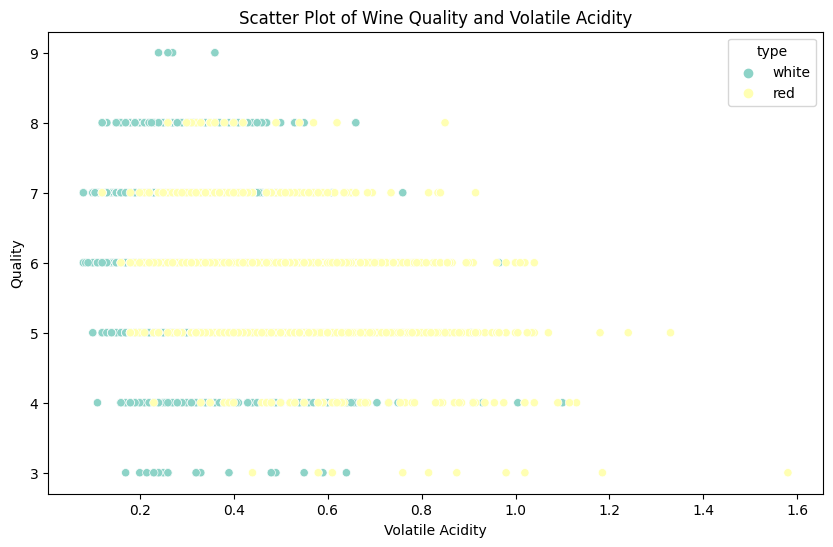

In [25]:
# Scatter plot of wine quality and volatile acidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='volatile acidity', y='quality', hue='type', palette='Set3')
plt.title('Scatter Plot of Wine Quality and Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

In [27]:
# standardizing the data with the feature scaling and defining dependent and the independent variables

# Encoding categorical variables and scaling numerical variables
data_encoded = data.drop('quality', axis=1).copy()
data_encoded = data_encoded.apply(LabelEncoder().fit_transform)
scaler = StandardScaler().fit(data_encoded)
X = scaler.transform(data_encoded)
y = data['quality']

In [28]:
# Splitting the dataset into the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [29]:
#training the base model first - Support Vector Classification

svc = SVC().fit(X,y)

In [30]:
print("Accuracy on the training set: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set: {:.4f}".format(svc.score(X_test, y_test)))

Accuracy on the training set: 0.6015
Accuracy on the test set: 0.6082


In [31]:
y_pred =svc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        60
           5       0.68      0.67      0.68       647
           6       0.56      0.78      0.66       837
           7       0.64      0.28      0.39       344
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1950
   macro avg       0.27      0.25      0.25      1950
weighted avg       0.58      0.61      0.57      1950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Hyperparameter training

# Defining the parameter grid
param_grid = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

# Creating the grid search object
grid_svc = GridSearchCV(SVC(), param_grid=param_grid, scoring='accuracy', cv=10)

# Fitting the grid search object to the training data
grid_svc.fit(X_train, y_train)

# Obtaining the best parameters found by grid search
best_params = grid_svc.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#adjusting the parameters to get the highest accuracy without overfitting
svc = SVC(C=1.3, gamma= 1.1, kernel ='rbf')
svc.fit(X, y)

In [ ]:
print("Accuracy on the training set: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set: {:.4f}".format(svc.score(X_test, y_test)))

In [ ]:
y_pred =svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

In [ ]:
#by increasing the regularization parameter C the model generalized better and increased the accuracy without overfitting
svc = SVC(kernel='rbf',C=10,gamma=1)
svc.fit(X, y)

In [ ]:
print("Accuracy on the training set: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set: {:.4f}".format(svc.score(X_test, y_test)))

In [ ]:
# predicted dependent variable vs test data
y_pred = svc.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))